Для начала необходимо запустить сервер -- app.py, в данном случае -- локально (и не в ноутбуке), GET запрос идет по URL, который можно настроить resources/config.json,
поумолчанию: http://127.0.0.1:5000/

In [6]:
!python3 app.py

 * Serving Flask app 'app' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
^C


In [1]:
import client
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 'svg', 'retina'
plt.style.use('seaborn-white')

Мнимальные настройки

In [2]:
config_file = "resources/config.json"
params = client.init_params(config_file, "tolerance")
URL = params["URL"]
URL

'http://127.0.0.1:5000/api/identify'

Теперь можно проверить систему в действии, протестировав успешные случаи и все типы ошибок

In [3]:
jobs = "samples/sample_img_0000.jpeg"
musk = "samples/sample_img_0001.jpg"
no_faces = "samples/no_faces.jpg"
n_faces = "samples/n_faces.jpeg"

source_map = {"jobs": "0000", "musk": "0001"}

Несколько примеров:

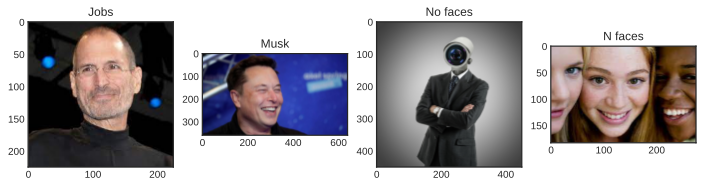

In [4]:
samples = {"Jobs": jobs, "Musk": musk, "No faces": no_faces, "N faces": n_faces}
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4))
for sample, ax in zip(samples, axs.flatten()):
    plt.sca(ax)
    pil_im = Image.open(samples[sample], 'r')
    plt.imshow(np.asarray(pil_im))
    plt.title(sample)

plt.show()

0000 -- Джобс, 0001 -- Маск

In [6]:
report = client.get_identification_report("0001", image_path=jobs, URL=URL)
report

{'Идентификация': 'Ошибка',
 'Причины': 'Другой человек в кадре',
 'Уверенность в схожести фотографии': '18.6%',
 'Должность': 'CEO',
 'Идентификатор должности': '1',
 'Порог точности': 0.7,
 'Отосланное фото сохранено в': 'history/unsuccessful/id0001/0.jpeg'}

In [7]:
report = client.get_identification_report("0000", image_path=jobs, URL=URL)
report

{'Идентификация': 'Успешно',
 'Причины': None,
 'Уверенность в схожести фотографии': '61.8%',
 'Должность': 'CEO',
 'Идентификатор должности': '1',
 'Порог точности': 0.7,
 'Отосланное фото сохранено в': 'history/successful/id0000/0.jpeg'}

In [8]:
report = client.get_identification_report("0001", image_path=musk, URL=URL)
report

{'Идентификация': 'Успешно',
 'Причины': None,
 'Уверенность в схожести фотографии': '58.9%',
 'Должность': 'CEO',
 'Идентификатор должности': '1',
 'Порог точности': 0.7,
 'Отосланное фото сохранено в': 'history/successful/id0001/1.jpeg'}

In [9]:
report = client.get_identification_report("0001", image_path=no_faces, URL=URL)
report

{'Идентификация': 'Ошибка',
 'Причины': 'Нет лиц в кадре',
 'Уверенность в схожести фотографии': None,
 'Должность': 'CEO',
 'Идентификатор должности': '1',
 'Порог точности': 0.7,
 'Отосланное фото сохранено в': 'history/unsuccessful/id0001/2.jpeg'}

In [10]:
report = client.get_identification_report("0001", image_path=n_faces, URL=URL)
report

{'Идентификация': 'Ошибка',
 'Причины': 'Более одного лица в кадре',
 'Уверенность в схожести фотографии': None,
 'Должность': 'CEO',
 'Идентификатор должности': '1',
 'Порог точности': 0.7,
 'Отосланное фото сохранено в': 'history/unsuccessful/id0001/3.jpeg'}

In [11]:
report = client.get_identification_report("0002", image_path=jobs, URL=URL)
report

{'Идентификация': 'Ошибка',
 'Причины': 'Идентификационный номер отсутствует в БД',
 'Уверенность в схожести фотографии': None,
 'Должность': None,
 'Идентификатор должности': None,
 'Порог точности': 0.7,
 'Отосланное фото сохранено в': 'history/unsuccessful/id0002/0.jpeg'}